In [1]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.1.0


In [2]:
fashion_mnist = tf.keras.datasets.fashion_mnist
(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [3]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']


In [4]:
train_images = train_images / 255.0

test_images = test_images / 255.0

In [5]:
model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28, 28)),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dense(10)
])

In [6]:
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [7]:
model.fit(train_images, train_labels, epochs=10)

Train on 60000 samples
Epoch 1/10
60000/60000 [==============================] - 4s 59us/sample - loss: 0.4987 - accuracy: 0.8239
Epoch 2/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3772 - accuracy: 0.8645
Epoch 3/10
60000/60000 [==============================] - 3s 56us/sample - loss: 0.3379 - accuracy: 0.8766
Epoch 4/10
60000/60000 [==============================] - 3s 53us/sample - loss: 0.3147 - accuracy: 0.8847
Epoch 5/10
60000/60000 [==============================] - 4s 72us/sample - loss: 0.2981 - accuracy: 0.8908
Epoch 6/10
60000/60000 [==============================] - 3s 50us/sample - loss: 0.2807 - accuracy: 0.8964
Epoch 7/10
60000/60000 [==============================] - 3s 57us/sample - loss: 0.2667 - accuracy: 0.9007
Epoch 8/10
60000/60000 [==============================] - 3s 58us/sample - loss: 0.2586 - accuracy: 0.9034
Epoch 9/10
60000/60000 [==============================] - 3s 51us/sample - loss: 0.2495 - accuracy: 0.9073
Epoch 10/10
60

In [9]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)

print('\nTest accuracy:', test_acc)

10000/10000 - 0s - loss: 0.3502 - accuracy: 0.8841

Test accuracy: 0.8841


In [10]:
probability_model = tf.keras.Sequential([model, 
                                         tf.keras.layers.Softmax()])

In [13]:
predictions = probability_model.predict(test_images)


In [18]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')


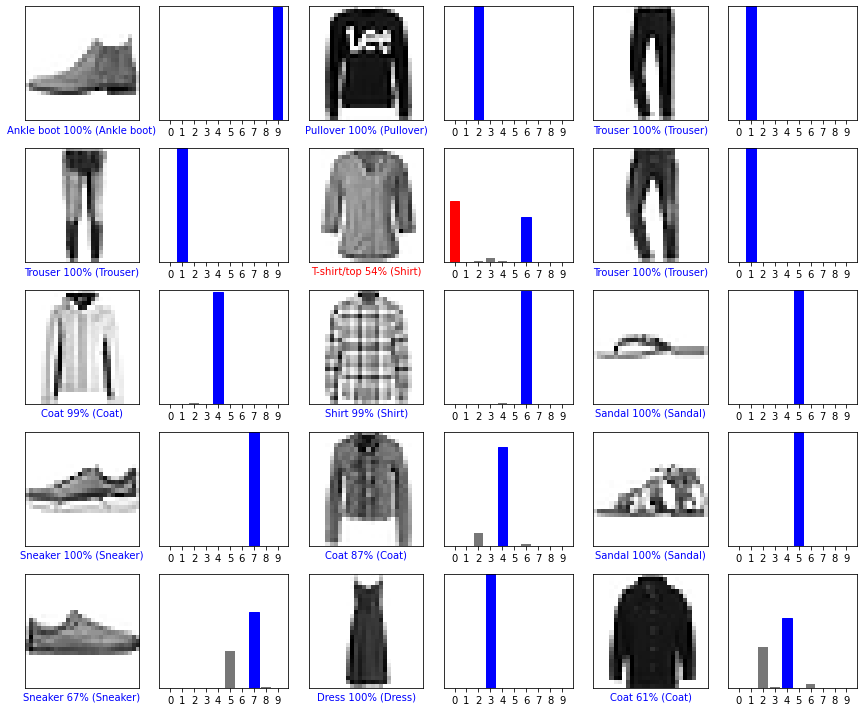

In [21]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()



In [23]:
# Grab an image from the test dataset.
img = test_images[1]

# Add the image to a batch where it's the only member.
img = (np.expand_dims(img,0))

(1, 28, 28)


In [24]:
predictions_single = probability_model.predict(img)

[[1.0425773e-05 1.7623639e-14 9.9968958e-01 8.3769477e-11 2.9276297e-04
  1.0392744e-12 7.3274564e-06 3.4882955e-10 2.3527955e-09 3.7549211e-10]]


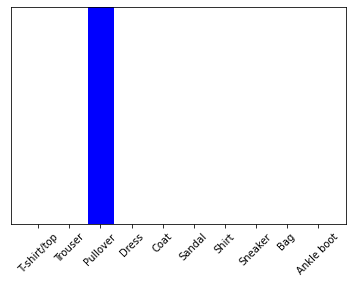

In [25]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()